In [1]:
base_path = "/content/drive/My Drive/Github/mtc-device-activation"

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from google.colab import drive
drive.flush_and_unmount()
drive.mount('/content/drive')# Load saved data

Drive not mounted, so nothing to flush and unmount.
Mounted at /content/drive


In [4]:
!apt-get update
!apt-get install texlive-latex-extra texlive-fonts-recommended dvipng cm-super

Hit:1 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Get:3 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Hit:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Get:5 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:6 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:7 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Get:10 https://r2u.stat.illinois.edu/ubuntu jammy/main all Packages [9,106 kB]
Hit:11 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:12 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 Packages [3,420 kB]
Get:13 http://archive.ubuntu.com/ubuntu jammy-updates/universe amd64 Packages 

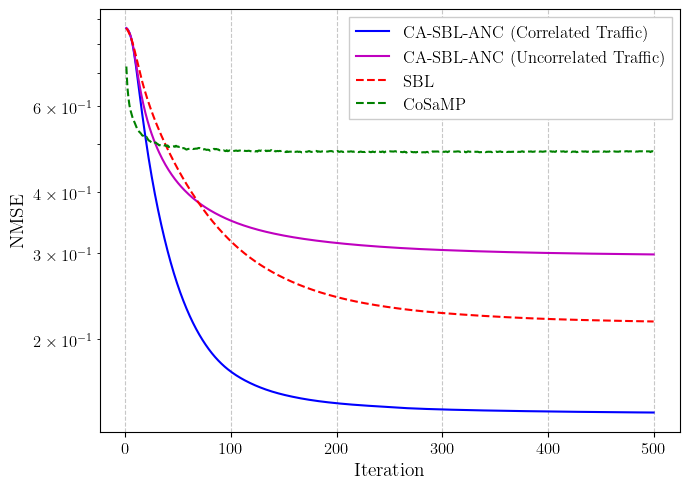

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# === Define paths to convergence data ===
file_paths_convergence = {
    r'CA-SBL-ANC (Correlated Traffic)': f'{base_path}/convergence/data/casbl_snr_db_12_pilot_length_30_convergence.npz',
    r'CA-SBL-ANC (Uncorrelated Traffic)': f'{base_path}/convergence/data/casbl_uc_snr_db_12_pilot_length_30_convergence.npz',
    r'SBL': f'{base_path}/convergence/data/sbl_snr_db_12_pilot_length_30_convergence.npz',
    r'CoSaMP': f'{base_path}/convergence/data/cosamp_snr_db_12_pilot_length_30_convergence.npz',
}

# === Plot styles for each method ===
plot_styles = {
    r'CA-SBL-ANC (Correlated Traffic)': {'color': 'b', 'marker': '', 'linestyle': '-'},
    r'CA-SBL-ANC (Uncorrelated Traffic)': {'color': 'm', 'marker': '', 'linestyle': '-'},
    r'SBL': {'color': 'r', 'marker': '', 'linestyle': '--'},
    r'CoSaMP': {'color': 'g', 'marker': '', 'linestyle': '--'},
}

# === Load convergence datasets ===
convergence_datasets = {}
for label, path in file_paths_convergence.items():
    data = np.load(path, allow_pickle=True)
    convergence_datasets[label] = data['nmse_iter_all']  # shape: [samples, iterations]

# === Set global plot params ===
plt.rcParams.update({
    'font.family': 'serif',
    'text.usetex': True,
    'axes.labelsize': 14,
    'axes.titlesize': 16,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12,
    'legend.fontsize': 12,
    'grid.linestyle': '--',
    'grid.alpha': 0.7,
})

# === Plot NMSE vs Iteration ===
plt.figure(figsize=(7, 5))
for label, nmse_matrix in convergence_datasets.items():
    style = plot_styles[label]

    avg_nmse = np.mean(nmse_matrix, axis=0)

    plt.plot(
        np.arange(1, len(avg_nmse) + 1),
        avg_nmse,
        marker=style['marker'],
        linestyle=style['linestyle'],
        color=style['color'],
        label=label
    )

plt.xlabel('Iteration')
plt.ylabel('NMSE')
plt.yscale('log')
plt.grid(True)
plt.legend(frameon=True, framealpha=1, facecolor='white', fancybox=False)
plt.tight_layout()
plt.savefig(f'{base_path}/convergence/figures/nmse_convergence.eps', format='eps', bbox_inches='tight', dpi=300)
plt.show()
